# ***LOGISTIC REGRESSION***
Logistic Regression is used for classification problems, examples -
* Spam vs non-spam emails
* Cancer vs Non-cancer patients


#### **LOGISTIC REGRESSION USES THE ACTIVATION FUNCTION -**
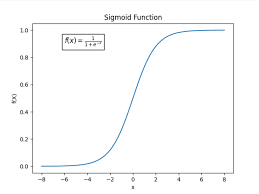

## ***IMPORTING THE TITANIC DATASET***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv("titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


`sIBsP` - SIBLINGS
`Parch` = passengers with children

## ***DATA ANALYSIS***

In [4]:
len(train)

891

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**NOTE THAT WE HAVE SOME MISSING DATA IN AGE COLUMN AND IN THE CABIN COLUMN**

<Axes: >

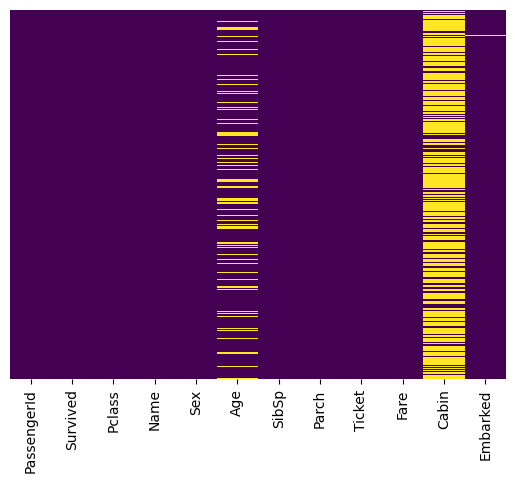

In [7]:
## Let's create a heatmap of null values
sns.heatmap(train.isnull(), yticklabels = False, cbar=False, cmap='viridis')

violet --> real data

yellow --> null data

In [8]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

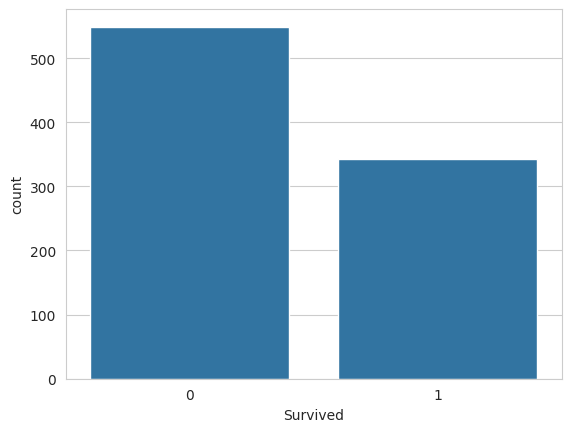

In [9]:
## GETTING THE COUNT OF WHO SURVIVED AND WHO DIDNT
sns.countplot(x = "Survived", data = train)

0 --> who didnot survived

1 --> who survived

<Axes: xlabel='Survived', ylabel='count'>

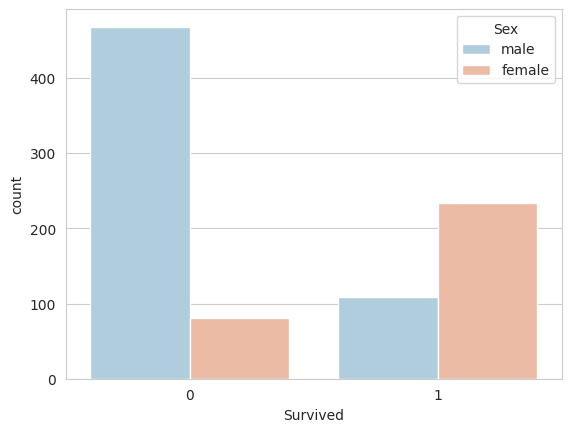

In [10]:
## Survival coutplot with hue of sex
sns.countplot(x="Survived", hue="Sex", data=train, palette='RdBu_r')

People who didnot survived were more likely male

<Axes: xlabel='Survived', ylabel='count'>

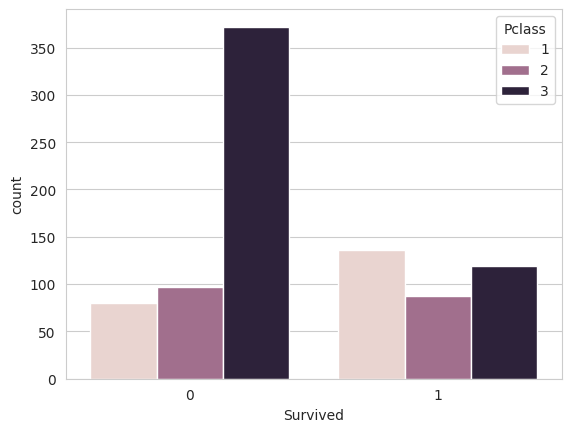

In [12]:
## Survival coutplot with hue of passenger class
sns.countplot(x="Survived", hue="Pclass", data=train)

People who didnot survive were of lower class (3), the cheapest one and the ones with high chances of survival were ones with higher class.

<ipython-input-13-b61f61f2d119>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Age"].dropna(), kde=False, bins=30)


<Axes: xlabel='Age'>

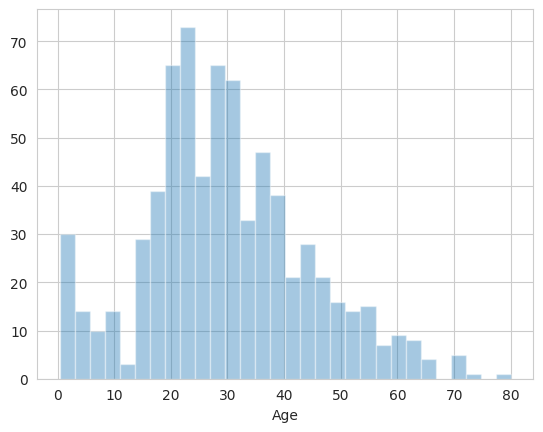

In [13]:
## Distribution plot
sns.distplot(train["Age"].dropna(), kde=False, bins=30)

More passengers had age from 20 - 40

<Axes: xlabel='SibSp', ylabel='count'>

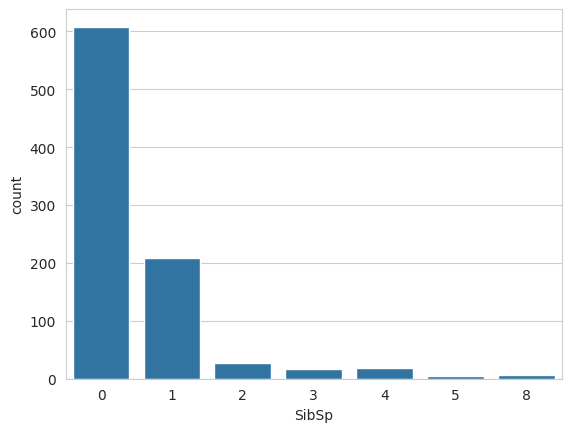

In [14]:
## Exploring SibSp --> No. of siblings / Spouses on board
sns.countplot(x='SibSp', data=train)

Most people on board had didnot had a spouse or sibling

<Axes: xlabel='Parch', ylabel='count'>

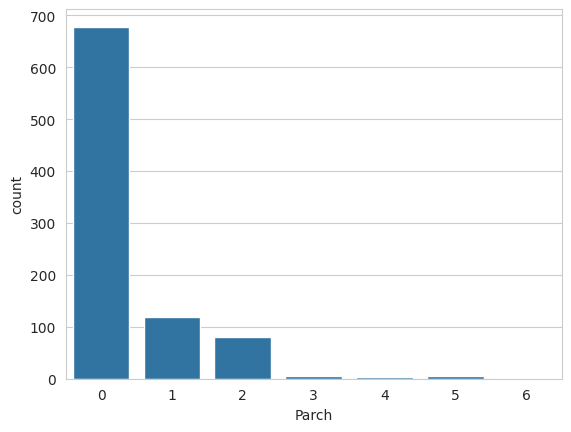

In [16]:
sns.countplot(x='Parch', data=train)

<Axes: >

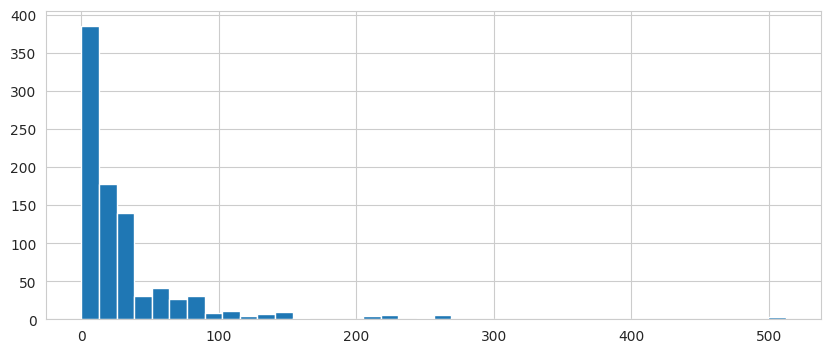

In [19]:
# Let's take a look at how much people paid as fared
train["Fare"].hist(bins=40, figsize=(10,4))

Most fare prices are towards - 0 50. We have seen most passengers are in the cheaper 3rd class, so it can be that fare is low, between 0-50

## ***FILLING THE MISSING DATA -- AGE***
* We are gonna fill the missing data of each passenger with average age in the passenger class

<Axes: xlabel='Pclass', ylabel='Age'>

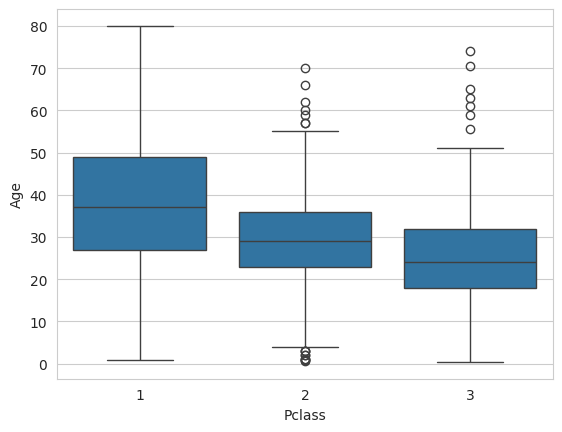

In [20]:
sns.boxplot(x="Pclass", y="Age", data=train)

* Pclass 1 --> mean age = 37

* Pclass 2 --> mean age = around 28

* Pclass 3 --> mean age = aroung 23

In [23]:
def immpute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
       return 37
    elif Pclass == 2:
       return 29
    else:
       return 24
  else:
    return Age


train['Age'] = train[['Age', 'Pclass']].apply(immpute_age, axis=1)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
train['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


## ***DROPPING COLUMN -- CABIN***

In [29]:
train.drop('Cabin', axis=1, inplace=True)

In [30]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


## ***DROPPING THE MISSING VALUES IN EMBARKED***
As there are only 2 missing (null) values in embarked, we are just gonna drop those rows


In [34]:
train.dropna(inplace=True)

<Axes: >

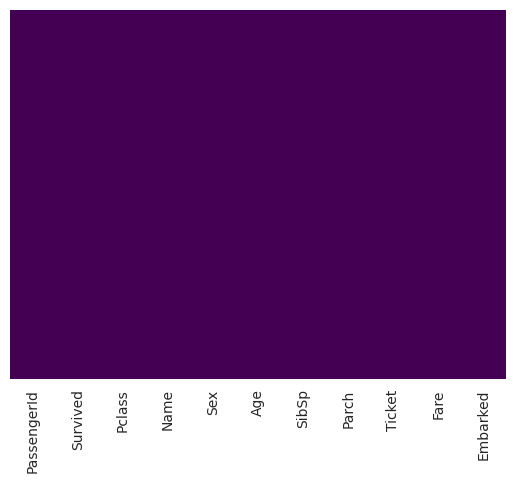

In [38]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Notice that now we have no null values

## ***CATEGORICAL FEATURES***

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### ***CHANGING THE SEX,EMBARKED COLUMN TO BINARY WITH 0 AND 1***

In [51]:
sex = pd.get_dummies(train['Sex'], drop_first=True).astype(int)
sex.head(2)

,male
0,1
1,0


In [50]:
embarked = pd.get_dummies(train['Embarked'], drop_first=True).astype(int)
embarked.head(2)

,Q,S
0,0,1
1,0,0


In [52]:
# Adding the new columns
train = pd.concat([train, sex, embarked], axis = 1)
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


### ***DROPPING THE COLUMNS***

In [53]:
train.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [54]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0


In [55]:
## Dropping Name and Ticket as we wont use them
train.drop(['Name', 'Ticket'], axis=1,inplace=True)

In [57]:
## PassengerId is just as index, so let's drop it
train.drop('PassengerId', axis=1, inplace = True)

In [58]:
train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


## ***TRAINING MODEL***

In [59]:
from sklearn.model_selection import train_test_split

X = train.drop('Survived', axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state = 101)

In [60]:
len(X_train), len(X_test), len(y_train), len(y_test)

(595, 294, 595, 294)

In [62]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
preds = logistic_model.predict(X_test)

## ***EVALUATING THE MODEL***


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       174
           1       0.83      0.68      0.74       120

    accuracy                           0.81       294
   macro avg       0.81      0.79      0.80       294
weighted avg       0.81      0.81      0.81       294



In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[157,  17],
       [ 39,  81]])